## Keras Tutorial: Use Pretrained VGG Network for Image Classification
This notebook contains a pretrained ImageNet CNN model (VGG) to classify an given image.

In [1]:
# some setup code
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
from skimage.transform import resize
from skimage import data, transform, io, util

# A bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline 
import matplotlib.pyplot as plt

# ignore warnings about matplotlib, if any

Using Theano backend.
/Users/seo/anaconda3/envs/cnnPy3/lib/python3.4/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


### Define a VGG model 

This method creates a VGG model by calling Keras APIs.
Specifically, we'll need *Convolution2D*, *MaxPooling2D*, *ZeroPadding2D* for convolution, pooling and zero-padding (on 2d data) respectively. 


Please check the [documentation](http://keras.io/layers/convolutional/) for details.

In [2]:
def VGG_16(weights_path=None):
    model = Sequential() # initialize our model
    
    # [(Zero-padding) Conv + (Zero-padding) Conv + Pooling] 
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224))) 
    model.add(Convolution2D(64, 3, 3, activation='relu')) # note the number of windows (depth of the output) is 64
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu')) # now the depth is 128
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu')) # 256
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu')) # 512
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu')) # 512
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    # Fully connected layers: 4096-4096-1000-softmax
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax')) # we use softmax again as in MNIST

    if weights_path:
        model.load_weights(weights_path)

    return model

### Some Helper Function

In [3]:
# return the label corresponding to nth category in ImageNet (0<=n<1000)
with open('label_imagenet.txt', 'r') as f:
    image_label = np.asarray(f.read().split('\n'))
def getImageLabel(n):
    return image_label[n]


def classify(path_to_image, model):
    """
    return the top 5 result (in a list) of the image using the given model
    """
    im = io.imread(path_to_image)[:,:,:3] # load our image
    # resize the image because our model only receives image of shape (224,224)
    im = util.img_as_ubyte(transform.resize(im, (224, 224)))
    im = im.astype(np.float32)
    # preprocessing: mean extraction. Those numbers were calculated during training.
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    # our model wants the input to be (sample, channel, row, column)
    # but we are only testing one image so the first axis should be 1.
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0) # make im into shape (1, channel, row, column). numpy doc: http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.expand_dims.html
    out = model.predict(im)[0]
    return out.argsort()[::-1][:5] # return the first 5 results; argsort outputs the array in ascending order

### Load Pretrained Model and Compile it

In [5]:
model = VGG_16('vgg16_weights.h5') # load the weights. Please set the correct path to the weight file.
# You don't need to worry about the followling line right now. Just some optimization method
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True) 
model.compile(optimizer=sgd, loss='categorical_crossentropy')

/Users/seo/anaconda3/envs/cnnPy3/lib/python3.4/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


1: baboon
2: macaque
3: patas, hussar monkey, Erythrocebus patas
4: meerkat, mierkat
5: wallaby, brush kangaroo


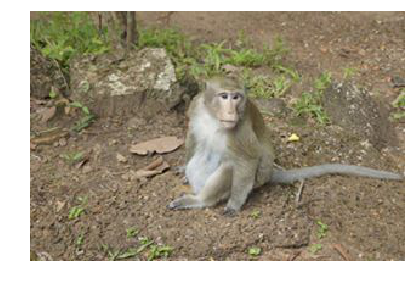

In [7]:
# You can replace it with # 1) an image from ImageNet dataset (http://image-net.org/explore) or
# 2) your own picture (but remember the model only knows 1000 classes!) 
# Either web link or local file will work
# path_to_image = 'http://cs.stanford.edu/people/karpathy/ilsvrc/val/ILSVRC2012_val_00040003.JPEG'
path_to_image = "https://fb-s-c-a.akamaihd.net/h-ak-fbx/v/t1.0-0/p206x206/389366_378785562178364_1099577373_n.jpg?oh=0d82f5579d8a53d0d8bd5089abeb29fb&oe=59BEBEA8&__gda__=1500914366_0ceb065b7c8fccf94ccb12d5d9cb0b4a"
io.imshow(io.imread(path_to_image)) # display the image
plt.axis('off') # do not show x/y axis

# Use pretrained model to do prediction and output the results
top5_index = classify(path_to_image, model)
top5_name = getImageLabel(top5_index)
for i, name in enumerate(top5_name):
    print("{0}: {1}".format(i+1, name))    

# ignore warnings about precision loss, if any